# Info

La información sobre los porque y contexto del proyecto así como su información acerca de las variables fue guardada en Github (https://github.com/devFrow/Proyecto_trancitorio.git)
para una mayor comodidad a la hora de trabajar con el código. 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
#imputador knn
from sklearn.impute import KNNImputer


In [3]:
url = 'https://raw.githubusercontent.com/devFrow/Proyecto_trancitorio/main/train.csv'
url2 ='https://raw.githubusercontent.com/devFrow/Proyecto_trancitorio/main/test.csv'

df_train = pd.read_csv(url, sep = ',')
df_test = pd.read_csv(url2, sep = ',')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Train",df_train.shape)
print('Test',df_test.shape)

Train (1460, 81)
Test (1459, 80)


In [4]:
df_test.head() # el df de test no tiene "SalePrice"
df_test['SalePrice'] = pd.Series() #agrego "SalePrice" para que sea igual a train
df_null = pd.concat([df_train,df_test],axis=0).reset_index(drop=True) #creo el df con la suma de los dos para tratar duplicados y vacíos
df_null = df_null.drop('Id',axis=1 )

C:\Users\nukke\AppData\Local\Temp\ipykernel_15212\4124765837.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_test['SalePrice'] = pd.Series() #agrego "SalePrice" para que sea igual a train


In [5]:
#Variables con el nombre mal puesto 

df_null.rename(columns={'KitchenAbvGr': 'Kitchen'}, inplace=True)
df_null.rename(columns={'BedroomAbvGr': 'Bedroom'}, inplace=True)

## Vacíos y duplicados

voy a ver si hay duplicados y vacíos para tratar pero los voy a tratar a cada caso cuando toque cada una de las categorías. 

In [6]:
print('Cantidad de duplicados: ',df_null.duplicated().value_counts())
total_nulos = df_null.isnull().sum()
print(total_nulos[total_nulos != 0 ].sort_values(ascending=False))

Cantidad de duplicados:  False    2919
dtype: int64
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


En el df total no hay duplicados, pero hay gran presencia de nulos, de todas maneras la mayoría refieren al hecho de no tener 'x' cualidad para cada una de las categorías. Más adelante voy a tratar cada uno de los casos.

## Variables 

Tenemos gran volumen de variables pero muchas son acerca de un mismo apartado de la casa:  ej. hay varias variables que hablan sobre el garage, así como de los baños, tamaños habitables de la casa etc. Voy a agruparlas para tratarlas tanto para solucionar sus valores nulos como para estudiarlas y ver que valor aportan a la solución.

estas son las 79 variables separadas categóricamente.

| **Alrededores y Forma** | **Ubicación**  | **Tamaños** | **Estilos** | **Estados** | **Tiempo** | **Techo** | **Revestimiento** | **Porch** | **Venta** |
|---------------------|------------|---------|---------|---------|--------|-------|---------------|-------|-------|
|Street|MSZoning|LotFrontage|MSSubClass|OverallQual|YearBuilt|	RoofMatl|	Exterior1st|	OpenPorchSF|	SaleType|
|Alley|	Neighborhood|	LotArea	|BldgType|	OverallCond|	YearRemodAdd|	RoofStyle|	Exterior2nd|	EnclosedPorch|	SaleCondition|
LotShape|	Condition1|	TotalBsmtSF|HouseStyle|Functional|	MoSold|		|MasVnrType|	3SsnPorch|	|
LandContour|	Condition2|	1stFlrSF|	|	|YrSold	|	|MasVnrArea|	ScreenPorch	||
LotConfig|	|	2ndFlrSF|		|	|||		ExterQual|||
LandSlope||		LowQualFinSF|||||					ExterCond|||		
|||GrLivArea||||||||	

\n

|**Cimientos**|**Sótano**|**Calefacción/Aire**|**Servicios**|**Baños**|**Habitaciones**|**Cocina**|**Garage**|**Extras**|
|-------------|----------|--------------------|-------------|---------|----------------|----------|----------|----------|
Foundation|BsmtQual|Heating|Utilities|BsmtFullBath|Bedroom|Kitchen|GarageType|WoodDeckSF|
||BsmtCond|HeatingQC|Electrical|BsmtHalfBath|TotRmsAbvGrd|KitchenQual|GarageYrBlt|PoolArea|
||BsmtExposure|CentralAir||FullBath|||GarageFinish|	PoolQC|
||BsmtFinType1|Fireplaces||HalfBath|||GarageCars|Fence|
||BsmtFinSF1|FireplaceQu|||||GarageArea|MiscFeature|
||BsmtFinType2||||||GarageQual|MiscVal|
||BsmtFinSF2||||||GarageCond||
||BsmtUnfSF||||||PavedDrive||



## Tratando vacíos  


#### Alrededores y forma 

Donde se encuentran las variables **Street**, **Alley**, **LotShape**, **landContour**, **LotConfig** y **LandSlope**

In [7]:
# La única variable que posee nulos es Alley y sus nulos corresponde con las casa que no poseen este tipo de accesos

df_null['Alley'].fillna('None', inplace=True)

### Ubicación 

Donde se encuentran las variables **MSZoning**, **Neighborhood**, **Condition1**, **Condition2**.

In [8]:
#La única variable que presenta nulos es MSZoning 

print(df_null['MSZoning'].isnull().sum())
df_null[df_null['MSZoning'].isnull()]

4


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2216,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2250,70,NaN,NaN,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2904,20,NaN,125.0,31250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


<Axes: xlabel='MSZoning', ylabel='SalePrice'>

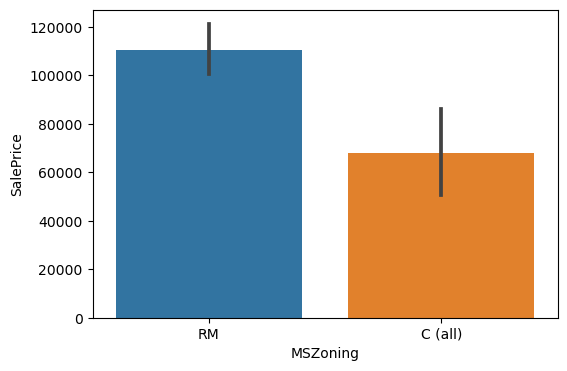

In [9]:
#como MSZoning habla de la clasificación de la zona vamos a ver que tienen otras casas que se encuentren en el mismo barrio. 

df_x = df_null[df_null['Neighborhood']=='IDOTRR']
df_x = df_x.dropna(subset=('SalePrice'))

plt.figure(figsize=(6,4))
sns.barplot(x='MSZoning',y='SalePrice',data=df_x)

In [10]:
#es una lastima no tener valores sobre el precio de venta porque se ve un clara diferenciación con el precio promedio entre una Zona y la otra, entonces vamos a aplicar la moda. para los 4 casos pero teniendo en cuenta el barrio. 


# Calcular la moda de 'MSZoning' para cada 'Neighborhood'
moda_por_barrio = df_null.groupby('Neighborhood')['MSZoning'].agg(lambda x: x.mode().iloc[0])
# Iterar sobre los registros con valores nulos en 'MSZoning'
for index, row in df_null[df_null['MSZoning'].isnull()].iterrows():
    # Obtener el vecindario del registro actual
    vecindario = row['Neighborhood']
    
    # Obtener la moda correspondiente al vecindario
    moda_vecindario = moda_por_barrio[vecindario]
    
    # Asignar la moda del vecindario al registro actual
    df_null.at[index, 'MSZoning'] = moda_vecindario
    
df_null.loc[[1915,2216,2250,2904]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,30,RM,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2216,20,RM,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2250,70,RM,NaN,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2904,20,RL,125.0,31250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


### Tamaños

Donde se encuentran las variables: **LotFrotage**, **LotArea**, **TotalBsmtSF**, **1stFlrSF**, **2mdFlrSF**, **LowQualFinSF**, **GrLivArea**.

In [11]:
#LotFrontage es una de las 2 variables que contienen nulos, como se refiere al tamaño del frente del lote, vamos a usara knn y los valores en LotArea y Neighborhood para ver cual es la casa que mas se parece y adjudicarle 
# ese valor de lot frontage



# Crear un imputador KNN
knn_imputer = KNNImputer(n_neighbors=1)

df_train = df_null[['LotFrontage', 'LotArea']].dropna()
knn_imputer.fit(df_train)

# Seleccionar las filas con valores nulos en 'LotFrontage' para imputarlos
df_to_impute = df_null[df_null['LotFrontage'].isnull()][['LotFrontage', 'LotArea']]
imputed_values = knn_imputer.transform(df_to_impute)

# Actualizar
df_null.loc[df_null['LotFrontage'].isnull(), 'LotFrontage'] = imputed_values[:, 0]



df_null['LotFrontage'].describe()

count    2919.000000
mean       70.232271
std        23.692025
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
#La otra variable que tiene nan es TotalBsmtSF pero solo tiene un valor null la voy a visualizar por las dudas (podría no tener sótano) pero las probable que le pongamos el promedio. 

df_null[df_null['TotalBsmtSF'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [13]:
# la variable no tiene sótano 
df_null['TotalBsmtSF'].fillna(0,inplace=True)
#voy a aprovechar al ver que una variable sin sótano también tiene medidas para FinType 1 y 2 también los voy a cargar con 0 
df_null['BsmtFinSF1'].fillna(0,inplace=True)
df_null['BsmtFinSF2'].fillna(0,inplace=True)
df_null['BsmtUnfSF'].fillna(0,inplace=True)

### Estados 

contiene las variable: **OverallQual**, **OverallCond**, **Funtional**

In [14]:
df_null[df_null['Functional'].isnull()]

#En este caso como es muy difícil extrapolar el dato mediante otros datos porque tanto puede tener un puntaje bajo por estar la vivienda extremadamente deteriorada o por se un galpón no apto para vivienda ademas de no contar 
#con las personas que realizaron el data set para sacarme la duda voy a aplicar la moda.  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2216,20,RM,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2473,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml,NaN


In [15]:
df_null['Functional'].fillna(df_null['Functional'].mode()[0], inplace=True)

### Revestimiento

Donde se encuentran las variables: **Exterior1st**,**Exterior2nd**, **MasVnrType**, **MasVnrArea**, **ExterQual**, **ExterCond** 

In [16]:
df_null[df_null['Exterior1st'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2151,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN


In [17]:
# voy a usar msssubclass para poner el valor faltante ya que los tipos de materiales que están de moda varían ene le tiempo y en esta variable captura un poco esa esencia 

moda_ext_subcl = df_null[df_null['MSSubClass'] == 30]['Exterior1st'].mode()[0]
df_null['Exterior1st'].fillna(moda_ext_subcl, inplace=True)

moda_ext_subcl2 = df_null[df_null['MSSubClass'] == 30]['Exterior2nd'].mode()[0]
df_null['Exterior2nd'].fillna(moda_ext_subcl, inplace=True)

Este es nuestro primer caso especial voy a tratar las 2 siguientes variables juntas porque están muy correlacionadas y presenten una particularidad, MasVnrType que habla del tipo de mampostería tiene 24 Nan y MasVnrArea que habla del area que abarca esta mampostería tiene 23 Nan osea que evidentemente una casa que tiene un area declarada tiene que tener un material. Por otro lado se me viene  a la cabeza que los vacíos en este caso pueden darse a falta de imputación por dos motivos: 1ro la aclaración en los datos no nos dice que los nans como en otras variables (PoolQual) pero ademas de que uno intuiría que una casa tiene revestimiento la mayoría de las casas con Nans de esta categoría presentan un OverAllQual y un OverallCond elevando remarcando OverallQual que habla de los materiales y terminaciones.

In [18]:
df_null[df_null['MasVnrType'].isnull()] 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,64.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,20,RL,90.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1691,60,RL,75.0,12891,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
1706,20,FV,90.0,7993,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm

In [19]:
#Primero voy a aplicar la moda según el estilo de la casa 

for index, row in df_null[df_null['MasVnrType'].isnull()].iterrows():
    #MSSubclass
    clase = row['MSSubClass']
    df_subset = df_null[(df_null['MSSubClass'] == clase) & (~df_null['MasVnrType'].isnull())]
    #moda
    moda = df_subset['MasVnrType'].mode()[0]
    df_null.at[index, 'MasVnrType'] = moda

In [20]:
#Segundo aplico el promedio de area a las casas con un tamaño parecido 

max_rag = 350
df_null['GrLivArea'] = pd.to_numeric(df_null['GrLivArea'], errors='coerce')
for index, row in df_null[df_null['MasVnrArea'].isnull()].iterrows():
    #GrLivArea
    tamaño = row['GrLivArea']
    #subset con limites
    df_subset = df_null[(df_null['GrLivArea'] >= (tamaño - max_rag )) & (df_null['GrLivArea'] <= (tamaño + max_rag)) & (~df_null['MasVnrArea'].isnull())]
    #promedio
    promedio  = df_subset['MasVnrArea'].mean()
    df_null.at[index, 'MasVnrArea'] = promedio

### Ventas 

Contiene las variables: **SaleType** y **SaleCondition**

In [21]:
#SaleType presenta solo un nan vamos a aplicarle la moda 

df_null.loc[df_null['SaleType'].isnull(), 'SaleType'] = df_null['SaleType'].mode()[0]

### Sótano 

Contiene las variables: **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2**, **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**.

En Basement tengo nulos en todas las categorías así que voy a hacer un pequeño df para visualizarlas aparte. 

In [22]:
# df para visualizar todos los nulos de basement

df_null_bsmt = df_null.filter(like='Bsmt')
total_nulos = df_null_bsmt.isnull().sum()
print(total_nulos[total_nulos != 0 ].sort_values(ascending=False))

BsmtCond        82
BsmtExposure    82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64


In [23]:
# los nan de los varaibles BsmtFullBath y BsmtHalfBath hacen referencia a una casa que no tiene sótano con los cual 

df_null['BsmtFullBath'].fillna(0,inplace=True )
df_null['BsmtHalfBath'].fillna(0,inplace=True )

In [24]:
#Voy a visualizar la diferencia entre BsmtType2 y BsmtType1 para ver si es algo correcto.
df_null_bsmt[(df_null_bsmt['BsmtFinType2'].isnull())&(~df_null_bsmt['BsmtFinType1'].isnull()) ] 

#Aunque podría el 2 ser Nan mientras el 1 no, en este caso veo que BsmtFinSF2 tiene un valor por lo que el nana del tipo 2 debe ser un error. 
#Como esto es una medida de calidad de las areas terminadas de la casa y sabiendo que tiene un BsmType1 = GLQ y que el OverAllQual = 8 las dos categorías hablando de lo bien terminada que esta la casa y el sótano le voy
#A aplicar el mismo que su compañero. 


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [25]:
df_null.loc[332,'BsmtFinType2'] = 'GLQ'

In [26]:
#Después de asegurarme de que no hay errores en la carga de BsmtFinType1 y siendo la variable con menos nulos y a sabiendas de que el que tenga nulo significa que la casa no tiene sótano la uso como guía.
#De esta manera puedo cargar todas las demás con None tranquilo de que se trata de casa que no tiene sótano. 

for index, row in df_null[df_null['BsmtFinType1'].isnull()].iterrows():
    if row[['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2']].isnull().all():
        df_null.at[index, 'BsmtCond'] = 'None'
        df_null.at[index, 'BsmtExposure'] = 'None'
        df_null.at[index, 'BsmtQual'] = 'None'
        df_null.at[index, 'BsmtFinType2'] = 'None'
        df_null.at[index, 'BsmtFinType1'] = 'None'
    else:
        print(f"Para el índice {index}: Al menos una de las variables relacionadas con el sótano tiene un valor distinto de nulo.")



In [27]:
#Voy a ver las que quedaron de Exposure que deben seguramente cambiarse por 'NO'
df_null[df_null['BsmtExposure'].isnull()]
#Viendo que los 3 tiene el Valor de BsmtType1 en Unf le voy a poner la moda para estos casos.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500.0
1487,20,RL,73.0,8987,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN
2348,60,FV,81.0,10411,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,NaN


In [28]:
df_moda_bsmt = df_null[(df_null['BsmtFinType1']=='Unf')&(~df_null['BsmtExposure'].isnull())]
moda = df_moda_bsmt['BsmtExposure'].mode()[0]

#asignando la moda 

df_null.loc[df_null['BsmtExposure'].isnull(), 'BsmtExposure'] = moda

In [29]:
#BsmtQual habla de la altura vamos a mirar la altura promedio de sótanos que tengan en mas o menos el mismo tamaño 

max_rag = 350
#df_null['GrLivArea'] = pd.to_numeric(df_null['GrLivArea'], errors='coerce')
for index, row in df_null[df_null['BsmtQual'].isnull()].iterrows():
    #GrLivArea
    tamaño = row['TotalBsmtSF']
    #subset con limites
    df_subset = df_null[(df_null['TotalBsmtSF'] >= (tamaño - max_rag )) & (df_null['TotalBsmtSF'] <= (tamaño + max_rag)) & (~df_null['BsmtQual'].isnull())]
    #moda
    moda  = df_subset['BsmtQual'].mode()[0]
    df_null.at[index, 'BsmtQual'] = moda

In [30]:
df_null[df_null['BsmtCond'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2040,20,RL,103.0,16280,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,NaN
2185,20,RL,65.0,6500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,NaN
2524,80,RL,72.0,9720,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,NaN


In [31]:
#BsmtCond  habla sobre la condicion general del bsmt vamos a aplicarle la misma que la OverallCond de la vivienda 

df_null[df_null['BsmtCond'].isnull()]

df_null.loc[2040,'BsmtCond'] = 'Ex'
df_null.loc[2185,'BsmtCond'] = 'TA'
df_null.loc[2524,'BsmtCond'] = 'Gd'

### Calfacción y Aire

Contiene las variables: **Heating**, **HeatingQC**, **CentralAir**, **Fireplaces**, **FireplaceQu**.

In [32]:
#La única variable con nulos es FireplaceQu que correspondes a las viviendas que no tienen chimeneas. 

df_null['FireplaceQu'].fillna('None',inplace=True)


### Servicios.

Contiene: **Utilities**, **Electrical**

In [33]:
#el 99.9 de las casa tiene el mismo valor aplicamos moda
df_null['Utilities'].fillna(df_null['Utilities'].mode()[0], inplace=True)

In [34]:
#Un solo valor perdido
df_null['Electrical'].fillna(df_null['Electrical'].mode()[0], inplace=True)

### Cocina

Contiene:  **Kitchen**, **KitchenQual**

In [35]:
#kitchen con un solo valor faltante aplicamos lo mismo que en overallqual
df_null['KitchenQual'].fillna('TA',inplace=True)

#### Garage

Contiene: **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageCars**, **GarageArea**, **GarageQual**, **GarageCond**, **PavedDrive**.

In [36]:
##Voy a ver primero las 2 mas probables mal cargadas que tienen que ver con el tamaño 

df_null[df_null['GarageArea'].isnull()]
df_null['GarageArea'].fillna(df_null['GarageArea'].mean(),inplace=True)

#Mirando los datos en los garages que tiene mas o menos ese tamaño pueden guardar hasta 2 autos. 
df_null['GarageCars'].fillna(2, inplace=True)

In [37]:
#La variable variable de año la voy a machear contra la de la edad de la casa  por comodidad  (no se me ocurre otra idea para que no interfiera en los datos, poner año 0 no seria correcto, siendo el año de la casa lo peor en cuanto
# a edad, obvio antes de decir que no tiene)

df_null['GarageYrBlt'].fillna(df_null['YearBuilt'],inplace=True)

In [38]:
#Luego sabiendo que la categoría GarageType en sus nan se refiere a casas sin garage y siendo la categoría que menos tiene voy a controlar a esta con las demás.

for index, row in df_null[df_null['GarageType'].isnull()].iterrows():
    if row[['GarageCond', 'GarageQual', 'GarageFinish']].isnull().all():
        df_null.at[index, 'GarageType'] = 'None'
        df_null.at[index, 'GarageCond'] = 'None'
        df_null.at[index, 'GarageQual'] = 'None'
        df_null.at[index, 'GarageFinish'] = 'None'
    else:
        print(f"Para el índice {index}: Al menos una de las variables relacionadas con el sótano tiene un valor distinto de nulo.")

In [39]:
#Busco los datos que presentan dif. 
df_null[df_null['GarageCond'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2126,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,None,Detchd,1910.0,NaN,1.0,360.000000,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal,NaN
2576,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1923.0,NaN,2.0,472.874572,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [40]:
#Como son 2 nada más los imputo a mano. 

df_null.loc[2126,'GarageCond']= df_moda_bsmt['GarageCond'].mode()[0]
df_null.loc[2126,'GarageQual']= df_moda_bsmt['GarageQual'].mode()[0]
df_null.loc[2126,'GarageFinish']= df_moda_bsmt['GarageFinish'].mode()[0]
df_null.loc[2576,'GarageCond']= df_moda_bsmt['GarageCond'].mode()[0]
df_null.loc[2576,'GarageQual']= df_moda_bsmt['GarageQual'].mode()[0]
df_null.loc[2576,'GarageFinish']= df_moda_bsmt['GarageFinish'].mode()[0]

### Extras

Contiene: **WoodDeckSF**, **PoolArea**, **PoolQC**, **Fence**, **MiscFeacture**, **MiscVal**.

In [41]:
## Donde PoolQC es nan significa que no hay pileta

#Primero vamos a ocuparnos es esta que es una variable que no tienen poolqc pero si area, interpreto que si tiene y le aplico el overallqc 
df_null[df_null['PoolQC'].isnull() & df_null['PoolArea']!=0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2599,20,RL,200.0,43500,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,None,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal,NaN


In [42]:
df_null.loc[2599,'PoolQC'] = 'TA'

In [43]:
#Aplico none a los vacios 

df_null['PoolQC'].fillna('None',inplace=True)

In [44]:
#Pasa lo mismo con Fence 

df_null['Fence'].fillna('None',inplace=True)

In [45]:
#Lo mismo con MiscFeature

df_null['MiscFeature'].fillna('None', inplace=True)

# Datos

Voy a exportar todo ya tratado para trabajar mas comodo con el EDA

In [46]:
df_train = df_null.iloc[:1460, :]
df_test = df_null.iloc[1460:, :]

df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)